<a href="https://colab.research.google.com/github/SteffanBurnette/Deeplearning-with-python-/blob/main/Charcter_level_lm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Intro to Charcter Level Language Model

**Character Level language model** - Treats every single word/line as an example. In each example it is treating them all as sequences of individual characters. A **character level lanuage model** is modeling the sequences of characters and learning how to predict the next character in the sequence.

### Current Popular Language Model Architectures
- Bigram
- Bag of words
- MLP
- RNN
- GRU
- Transformer

In [ ]:
#Mount the drive so that I can get the uploaded document into my colab enviornment
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Stores all the names in the file
words = open("/content/drive/MyDrive/names.txt", 'r').read().splitlines()

In [ ]:
#Outputs the first 5 names in the list
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

Lookng at the dataset to get an idea of what were working with:
- largest word
- smallest word
- number of words

In [ ]:
print(f"The number of words: {len(words)}")
print(f"The Smallest word length in the dataset: {min(len(w) for w in words)}")
print(f"The Largest word length in the dataset: {max(len(w) for w in words)}")

The number of words: 32033
The Smallest word length in the dataset: 2
The Largest word length in the dataset: 15


## Bigram Language Model
In a **bigram language model** were always working with just two characters at a time(The character that we are working with and the characters we are trying to predict).

- Is considered a simle but weak language model.

In [ ]:
b = {} #A dictionary to hold the conunt of bigrams in the dataset

#Using a two pointer approach to go through each word 2 characters at a time
for w in words[:3]:
  #Creates an array to hold the characters, starts the the special start token
  #Concatenates the w and adds a special end token <"E">
  chs = ["<S>"] + list(w) + ["<E>"]
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2) # A tuple of bygrams
    #Will add +1 to the value if the key exists, if it doesnt exist it will create
    #a record in the hashmap and give it an initial value of 0
    b[bigram] = b.get(bigram, 0) +1
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [ ]:
#Testing new two pointer method
lst = ["1111", "2222", "3333", "4444", "5555", "6666", "7777", "8888"]

for x1, x2 in zip(lst[0:], lst[1:]):
  print(x1, x2)

1111 2222
2222 3333
3333 4444
4444 5555
5555 6666
6666 7777
7777 8888


In [ ]:
lst_num = [11, 22, 33, 44, 55, 66, 77, 88, 99]

for y1, y2 in zip(lst_num[0:], lst_num[1:]):
  print(y1, y2)

11 22
22 33
33 44
44 55
55 66
66 77
77 88
88 99


In [ ]:
b #The count of the # of times a bigram has occured

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [ ]:
b = {} #A dictionary to hold the conunt of bigrams in the dataset

#Using a two pointer approach to go through each word 2 characters at a time
for w in words:
  #Creates an array to hold the characters, starts the the special start token
  #Concatenates the w and adds a special end token <"E">
  chs = ["<S>"] + list(w) + ["<E>"]
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2) # A tuple of bygrams
    #Will add +1 to the value if the key exists, if it doesnt exist it will create
    #a record in the hashmap and give it an initial value of 0
    b[bigram] = b.get(bigram, 0) +1


In [ ]:
b #Count of the number of bigram occurances of all the words

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [ ]:
#Sots in ascending order
sorted(b.items(), key = lambda kv: kv[1]) #Sorts by the value of the item at index 1 in the tuple

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

In [ ]:
#Sorts in descending order
sorted(b.items(), key = lambda kv: -kv[1]) #Sorts by the value of the item at index 1 in the tuple

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

Its more convenient to keep these values in a 2d array as opposed to a hashmap.

Rows = first character in the bigram
columns = second character in the bigram

This will tell use how often the sencond character follows the first character.

We can create a **tensor** which is an easy to manipulate multi dimensional array.

In [ ]:
import torch #pytorch

In [ ]:
a = torch.zeros((3, 5), dtype = torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
a[1, 3] = 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
#26 characters + 2 special tokens (<"S">, <"E">) =  28 characters
N = torch.zeros((28, 28), dtype = torch.int32)


In [ ]:
chars =  sorted(list(set(''.join(words))))
stoi = {s:i for i, s in enumerate(chars)} #Maps the unique string to a unique number
#Have to manually assigne due to them being special characters
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [ ]:
b = {} #A dictionary to hold the conunt of bigrams in the dataset

#Using a two pointer approach to go through each word 2 characters at a time
for w in words:
  #Creates an array to hold the characters, starts the the special start token
  #Concatenates the w and adds a special end token <"E">
  chs = ["<S>"] + list(w) + ["<E>"]
  for ch1, ch2 in zip(chs, chs[1:]):
    #Counting the number of bigram occurancews with a 2d tensor array
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


In [ ]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

### Visualizing the 2d array

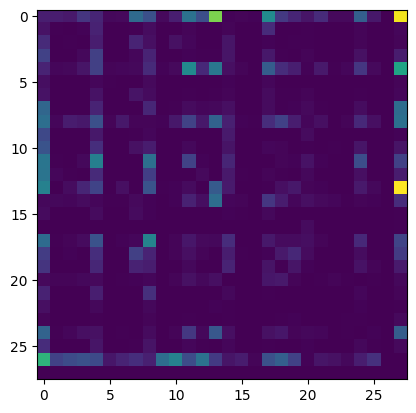

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

#### A simple Decoder of stoi

In [ ]:
#Converts the numbers back to characters
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

### Nicer Visualization
This code block will visualize the relationships between the charcacters.

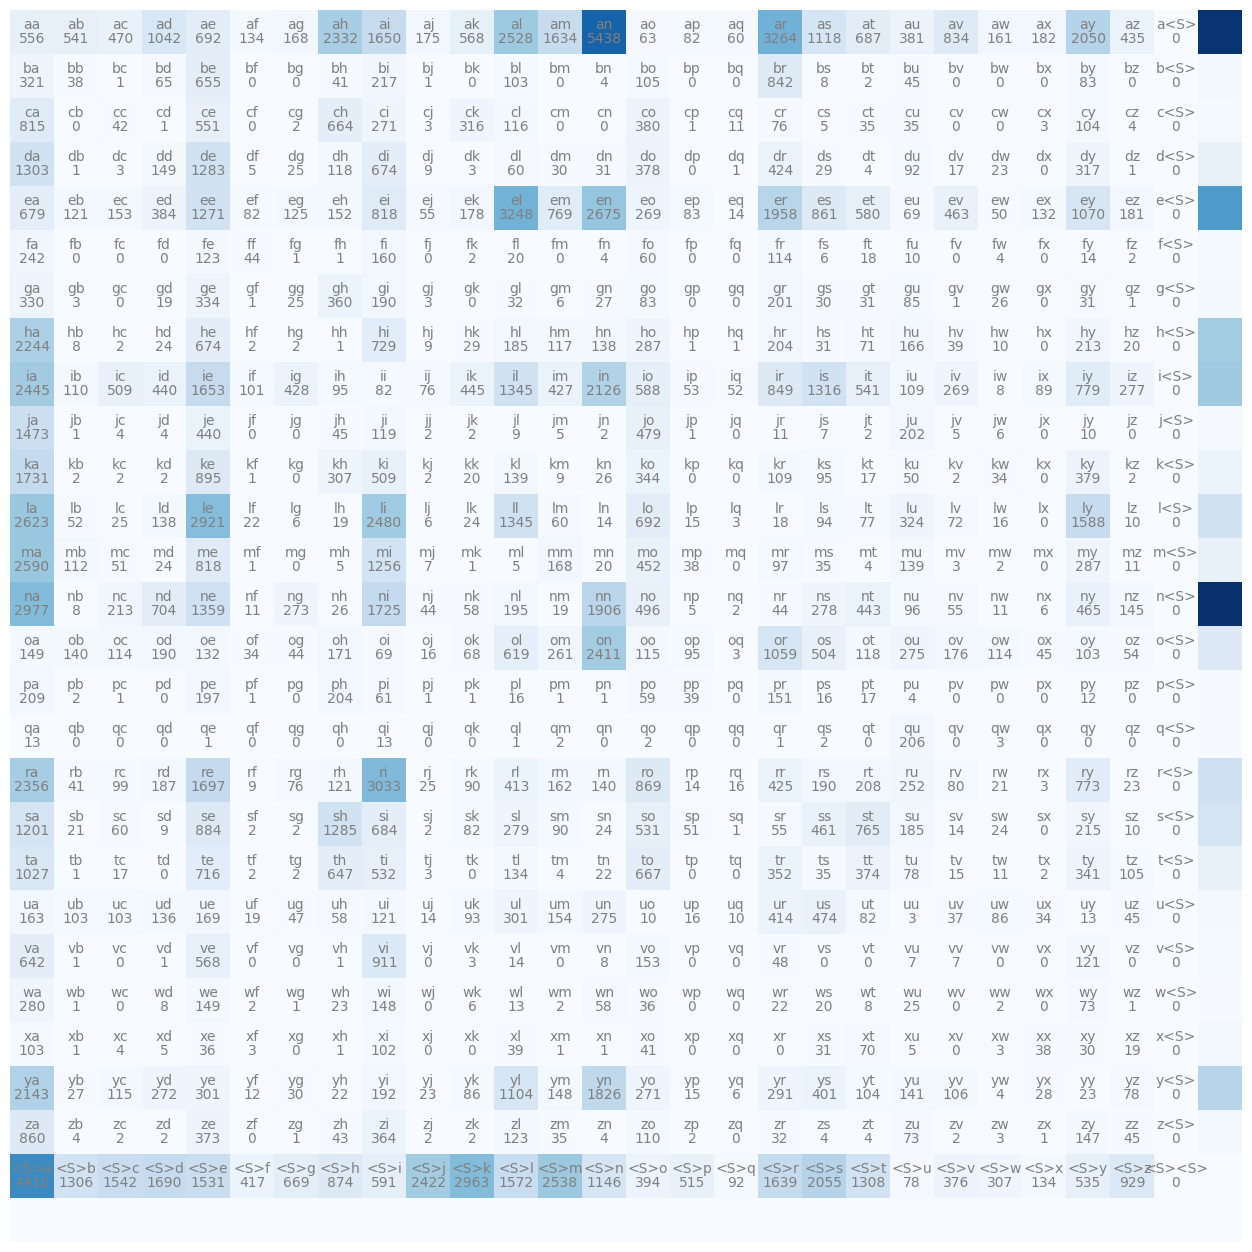

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

We seem to be wasting a lot of space by having two **special characters** so we will only have **one special character**. No only tha, but we will put the character at the beginning of each word so we will need to offset everything else by +1.

In [ ]:
#26 characters + 1 special tokens (<"."> =  27 characters
N = torch.zeros((27, 27), dtype = torch.int32)

#Converts each unique character to a unique integer
chars =  sorted(list(set(''.join(words))))
#s is the key, i+1 is the value
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0 #Place it at the first position

#Converts the numbers back to characters
#Turns i into the key and s into the value
#right now s is the key and i is the value
itos = {i:s for s, i in stoi.items()}

#Converts the characters to ints and gives the unique index location in the 2d tensor an increased count
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    #Counting the number of bigram occurancews with a 2d tensor array
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


In [ ]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

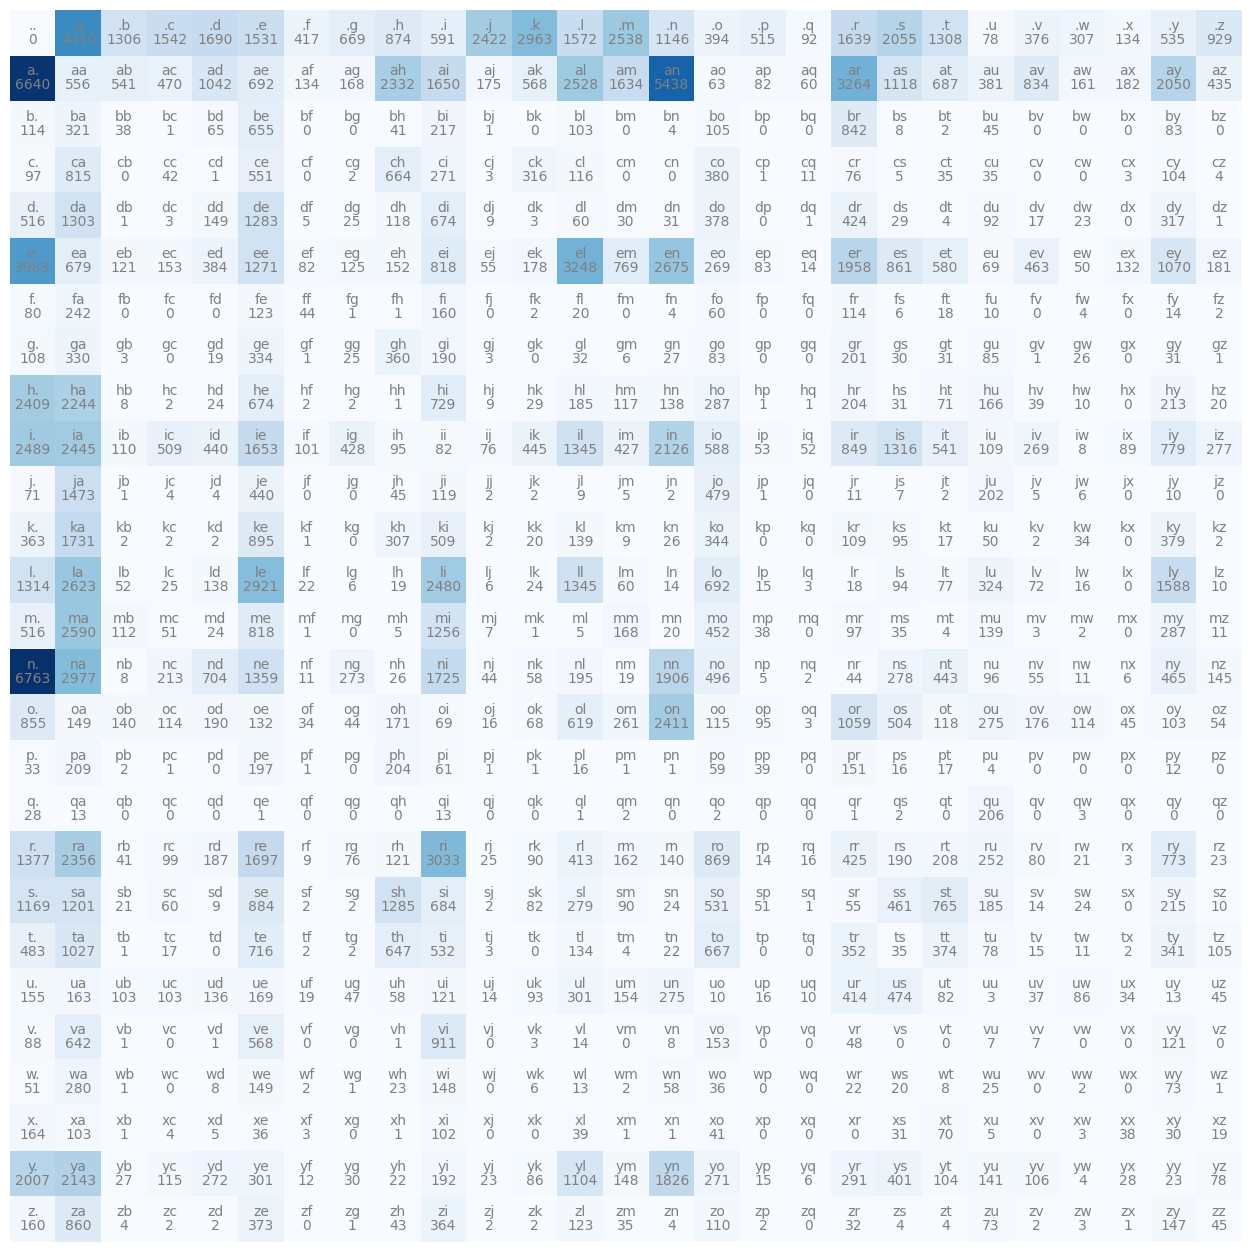

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
#Gives all the columns the specified row
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

### **Normalization**





In [ ]:
#This is how you get the probabilities of the likelihood of one of these characters being the first chaqracter in a word
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

## Sampling from the distribution


In [ ]:
#The generator will make this experiment deterministic
g = torch.Generator().manual_seed(2147483647) #Sets the seed
p = torch.rand(3, generator=g) #Creates 3 random numbers
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [ ]:
#Used to pick samples from the distribution
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [ ]:
g = torch.Generator().manual_seed(2147483647) #Sets the seed
p = N[0].float()
p = p / p.sum()
#Used to pick samples from the distribution
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [ ]:
g = torch.Generator().manual_seed(2147483647)

#Attempting to print out names
for i in range(5):

  out = [] #For sppending the predicted characters
  ix = 0
  while True:
    p = N[ix].float()
    p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


Getting rid of inefficiences in the loop

In [ ]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [ ]:
g = torch.Generator().manual_seed(2147483647) #Sets the seed

for i in range(5): #Five iterations

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


## Broadcasting Semantics
**Broadcasting** - When two tensor sizes do not match but you are trying to perform a **mathematical operation** between them pytorch will add 1's to the left of the smaller tensor until it matches the **shape** of the larger **tensor**.

# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
-  equivalent to maximizing the log likelihood (because log is monotonic)
- equivalent to minimizing the negative log likelihood
- equivalent to minimizing the average negative log likelihood

# **log(a * b * c) = log(a) + log(b) + log(c)**

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

#The Neural Network Approach

Will create a **bigram character level language model** utilizing the pytorch framework. It will operate the same, taking in 1 character and predicting the next character.

##Step 1: Create the training set of all the bigrams


In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Mount the drive so that I can get the uploaded document into my colab enviornment
from google.colab import drive
drive.mount('/content/drive')


#Stores all the names in the file
words = open("/content/drive/MyDrive/names.txt", 'r').read().splitlines()

Mounted at /content/drive


In [4]:
#26 characters + 1 special tokens (<"."> =  27 characters
N = torch.zeros((27, 27), dtype = torch.int32)

#Converts each unique character to a unique integer
chars =  sorted(list(set(''.join(words))))
#s is the key, i+1 is the value
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0 #Place it at the first position

#Converts the numbers back to characters
#Turns i into the key and s into the value
#right now s is the key and i is the value
itos = {i:s for s, i in stoi.items()}

**torch.tensor** infers the datatype automatically while **torch.Tensor** make the datatype **flot32** by default.

In [5]:
#Create the training set
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs) #Features
ys = torch.tensor(ys) #labels

. e
e m
m m
m a
a .


# One-hot-encoding
Will need to **ecode** the integer data before feeding it to the neural network. **One hot encoding** turns the specific data sample into a vector of all 0's where the only value that is a 1 is the position in the vector that represents the specific data sample being encoded.

In [12]:
import torch.nn.functional as F #Importing pytorches functional api
#Takes in the input data (features) and the number of potential categories that are in the entire training dataset
xenc = F.one_hot(xs, num_classes = 27).float() #Will need to typecast this to float to make sure that it is not int
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
#Have encoded 5 examples into vectors
xenc.shape

torch.Size([5, 27])

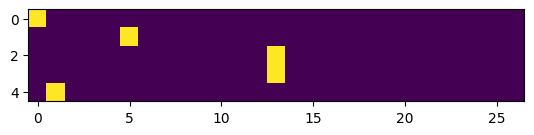

In [14]:
plt.imshow(xenc)

🔑Note- When plugging numbers into **neural networks** we want the datatypes to be float and not integer. This is so that the values can take on various ranges and not be confinded to a certain domain.

In [15]:
xenc.dtype

torch.float32

# The Neuron

In [18]:
W = torch.randn((27, 27)) #Initializing the weights
W

tensor([[ 1.0514e-01, -1.4327e+00, -1.1716e-01,  2.5629e-01, -1.2424e+00,
          1.3677e-01,  3.7230e-01, -1.3478e-01, -5.4045e-01, -6.0217e-02,
         -9.4619e-01,  2.4427e-01, -8.1754e-01,  9.9207e-01, -4.8112e-01,
         -2.0215e+00, -2.3814e-01,  2.3057e+00,  1.4849e-01, -9.9845e-01,
          1.1158e+00,  1.0937e+00,  3.6966e-01, -1.4787e+00, -4.6181e-01,
          9.4073e-01,  2.0334e-01],
        [ 4.8591e-02,  1.5919e-01,  9.7734e-01, -7.2199e-01,  5.1005e-01,
          8.1741e-01,  4.0568e-01,  6.4202e-01,  1.5089e+00,  1.0696e+00,
          1.1840e+00, -4.4610e-01, -8.9379e-01,  6.7958e-01, -1.3078e-01,
         -9.7701e-01, -3.6999e-01,  1.1669e+00, -1.5477e+00, -2.1055e+00,
         -2.0105e+00, -3.7364e-01, -2.8952e-01,  1.1666e+00,  1.0171e+00,
         -3.6968e-01, -1.2159e+00],
        [ 2.0444e-01, -1.4103e+00,  2.9796e-01, -6.6260e-02, -8.5031e-01,
          5.0184e-01, -1.9195e+00,  2.9711e-01,  6.0110e-01,  4.6930e-01,
          3.1814e-01,  1.0832e+00,  2.96

In [19]:
# (5, 27) @ (27, 27) ==> (5, 27)
xenc @ W #w*x +b (no b here at the moment)

tensor([[ 0.1051, -1.4327, -0.1172,  0.2563, -1.2424,  0.1368,  0.3723, -0.1348,
         -0.5405, -0.0602, -0.9462,  0.2443, -0.8175,  0.9921, -0.4811, -2.0215,
         -0.2381,  2.3057,  0.1485, -0.9985,  1.1158,  1.0937,  0.3697, -1.4787,
         -0.4618,  0.9407,  0.2033],
        [-0.8978,  0.7829,  0.4454, -0.3569,  0.1767, -0.9300, -0.7015, -1.1409,
         -0.6580, -0.1288, -1.9701, -0.8899, -0.2862,  1.1134,  0.5519,  1.3333,
         -0.5811,  0.9678,  0.6794, -0.2629, -0.9782, -1.2265, -1.3859, -1.1406,
         -0.0311,  0.0875,  1.3498],
        [ 1.1815, -0.7163, -0.1526, -1.1208, -0.4128, -0.6664,  1.1341,  0.3761,
          1.5604,  0.5658,  0.5001, -0.0058,  0.4415, -0.8449, -1.8400, -1.1124,
         -1.1454,  0.8768, -0.0139, -1.8878,  0.3208, -0.9647, -1.3592, -0.0905,
          1.3036, -0.1125,  0.0513],
        [ 1.1815, -0.7163, -0.1526, -1.1208, -0.4128, -0.6664,  1.1341,  0.3761,
          1.5604,  0.5658,  0.5001, -0.0058,  0.4415, -0.8449, -1.8400, -1.1124

In [22]:
#By interpreting the probability distributions as log counts they will no longer be postive/negative/all over the place
#All the negative numbers turned into numbers below 1 while all of the positive numbers turn into larger positive numbers
#Exponentiates numbers gives us something that we can interpret as counts
logits = (xenc @ W) #log counts
#These last two lines are performing the softmax activation function
counts = logits.exp() #Equivalient to N
prob = counts / counts.sum(1, keepdim = True) #Normalize over the first dimension
prob

tensor([[0.0286, 0.0061, 0.0229, 0.0333, 0.0074, 0.0295, 0.0374, 0.0225, 0.0150,
         0.0242, 0.0100, 0.0329, 0.0114, 0.0694, 0.0159, 0.0034, 0.0203, 0.2582,
         0.0299, 0.0095, 0.0786, 0.0768, 0.0373, 0.0059, 0.0162, 0.0659, 0.0315],
        [0.0129, 0.0692, 0.0494, 0.0221, 0.0377, 0.0125, 0.0157, 0.0101, 0.0164,
         0.0278, 0.0044, 0.0130, 0.0238, 0.0963, 0.0549, 0.1200, 0.0177, 0.0832,
         0.0624, 0.0243, 0.0119, 0.0093, 0.0079, 0.0101, 0.0307, 0.0345, 0.1220],
        [0.0939, 0.0141, 0.0247, 0.0094, 0.0191, 0.0148, 0.0895, 0.0419, 0.1371,
         0.0507, 0.0475, 0.0286, 0.0448, 0.0124, 0.0046, 0.0095, 0.0092, 0.0692,
         0.0284, 0.0044, 0.0397, 0.0110, 0.0074, 0.0263, 0.1060, 0.0257, 0.0303],
        [0.0939, 0.0141, 0.0247, 0.0094, 0.0191, 0.0148, 0.0895, 0.0419, 0.1371,
         0.0507, 0.0475, 0.0286, 0.0448, 0.0124, 0.0046, 0.0095, 0.0092, 0.0692,
         0.0284, 0.0044, 0.0397, 0.0110, 0.0074, 0.0263, 0.1060, 0.0257, 0.0303],
        [0.0260, 0.0290,

In [23]:
prob.shape

torch.Size([5, 27])

In [25]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', prob[i])
  print('label (actual next character):', y)
  p = prob[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0286, 0.0061, 0.0229, 0.0333, 0.0074, 0.0295, 0.0374, 0.0225, 0.0150,
        0.0242, 0.0100, 0.0329, 0.0114, 0.0694, 0.0159, 0.0034, 0.0203, 0.2582,
        0.0299, 0.0095, 0.0786, 0.0768, 0.0373, 0.0059, 0.0162, 0.0659, 0.0315])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.029514623805880547
log likelihood: -3.522869348526001
negative log likelihood: 3.522869348526001
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0129, 0.0692, 0.0494, 0.0221, 0.0377, 0.0125, 0.0157, 0.0101, 0.0164,
        0.0278, 0.0044, 0.0130, 0.0238, 0.0963, 0.0549, 0.1200, 0.0177, 0.0832,
        0.0624, 0.0243, 0.0119, 0.0093, 0.0079, 0.0101, 0.0307, 0.0345, 0.1220])
label (actual next character): 13
probability assigned by the net to the the correct character: 0

# The Entire Training process

In [26]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [27]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [28]:
print(loss.item())

3.7693049907684326


In [29]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [30]:
W.data += -0.1 * W.grad

In [31]:
W.data

tensor([[ 1.5661e+00, -2.3749e-01, -2.7631e-02, -1.1009e+00,  2.8554e-01,
         -9.8891e-03, -1.5471e+00,  6.0443e-01,  7.8862e-02,  9.0400e-01,
         -4.7141e-01,  7.8627e-01, -3.2862e-01, -4.3313e-01,  1.3719e+00,
          2.9286e+00,  1.5606e+00, -1.6261e+00,  6.7666e-01, -8.4050e-01,
          9.8420e-01, -1.4859e-01, -1.4796e+00,  4.4790e-01, -7.0966e-02,
          2.4937e+00,  2.4419e+00],
        [-6.5036e-01, -1.2201e+00,  3.0235e-01, -1.0727e+00,  7.2641e-01,
          5.0498e-02,  1.3073e+00, -8.0246e-01, -8.5067e-01, -1.8069e+00,
          1.2503e+00, -1.2258e+00,  1.2145e+00, -9.6500e-01, -2.3257e-01,
         -3.4803e-01,  3.3163e-01, -1.3264e+00,  1.1206e+00,  5.9535e-01,
          4.5753e-01,  5.3393e-02, -1.7401e+00,  1.1494e-01,  8.0189e-01,
          5.4007e-01, -1.1648e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

# Summary of what was done

## Step 1: Create the Dataset

In [35]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


## Step 2: Perform gradient Descent (forward pass, loss function, backwards pass, weight optimization)

In [36]:
# gradient descent
for k in range(10):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  #Activation function is softmax
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() #Loss function is the negative log likelihood + Generaization
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

3.7686190605163574
3.3788065910339355
3.16109037399292
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146339416504
2.7452542781829834
2.7188303470611572


In [34]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

juwjdjdjancqydjufhqyywecnw.
.
oiin.
toziasz.
twt.
